In [1]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
ProgressBar().register()
from scipy.signal import find_peaks
import numpy as np

In [2]:
BED_FILE = 'contigs.coverage1.bed'
#BED_FILE = 'xaa'
CONTIG_ID = 'tig00000002'

In [3]:
dtypes = {"id": "str","base_index" : "uint32", "start" : "uint32","end" : "uint32","coverage" : "int64"}
column_names = names=["id","start","end","base_index","coverage"]
dd_df = dd.read_csv(BED_FILE, sep='\t', dtype=dtypes,usecols=["id","start","end","base_index", "coverage"], names=column_names)

In [4]:
def aggr(x):
    return x.sum()
def first(x):
    return x.aggregate(list)
def fin(x):
    def custom_peak(cov):
        #print(cov)
        neg_cov = np.negative(cov)
        mean = np.mean(cov)
        return find_peaks(neg_cov, height=-mean/5, prominence=50)
    return x.apply(custom_peak)
my_agg = dd.Aggregation('my_agg', first, aggr, fin)
data = dd_df.groupby(['id']).aggregate({'coverage' : my_agg}).compute()

id
foo    [1, 1]
Name: my_agg-coverage-2af295f9502bbdb4cd46bc7fe9adfcac, dtype: object
[####################################### ] | 99% Completed |  1min 28.4sid
tig00000002    [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
tig00000003    [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
tig00000010    [7, 8, 8, 8, 10, 10, 11, 11, 13, 15, 15, 15, 1...
tig00000026    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, ...
tig00000029    [22, 23, 23, 26, 26, 30, 32, 33, 34, 39, 39, 3...
tig00000031    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
tig00000044    [3, 4, 5, 6, 6, 6, 6, 7, 7, 8, 8, 8, 10, 10, 1...
tig00000061    [15, 15, 15, 18, 22, 23, 23, 24, 26, 28, 29, 2...
tig00000068    [9, 14, 15, 16, 19, 19, 19, 19, 19, 19, 20, 20...
tig00000074    [4, 4, 4, 4, 4, 4, 4, 5, 5, 6, 7, 7, 7, 7, 7, ...
tig00000077    [8, 8, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 1...
tig00000081    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
tig00000082    [8, 9, 9, 9, 19, 20, 21, 21, 22, 23, 24, 26

In [36]:
print(len(data))
data['coverage'].apply(lambda x: x[1]['prominences']).where(lambda x: x.apply(len) > 0).dropna()


815


id
tig00000121                                [146.0]
tig00000262                                 [66.0]
tig00000325                                [128.0]
tig00000410                                 [62.0]
tig00000838                         [152.0, 167.0]
tig00000853                                [130.0]
tig00000857                                [309.0]
tig00000873                                [208.0]
tig00000889                                [114.0]
tig00000975                                 [76.0]
tig00000991                     [76.0, 76.0, 76.0]
tig00001027                                [158.0]
tig00001050                                [195.0]
tig00001236                         [225.0, 225.0]
tig00001288                                 [60.0]
tig00002226                       [971.0, 55271.0]
tig00005322                                [125.0]
tig00005360                                [161.0]
tig00005370                                [163.0]
tig00109098    [171.0, 171.0

In [119]:
bla=data.reset_index()
bla.head()

index                                           coverage
0      0  ([], {'peak_heights': [], 'prominences': [], '...
1      1  ([], {'peak_heights': [], 'prominences': [], '...
2      2  ([], {'peak_heights': [], 'prominences': [], '...
3      3  ([], {'peak_heights': [], 'prominences': [], '...
4      4  ([], {'peak_heights': [], 'prominences': [], '...

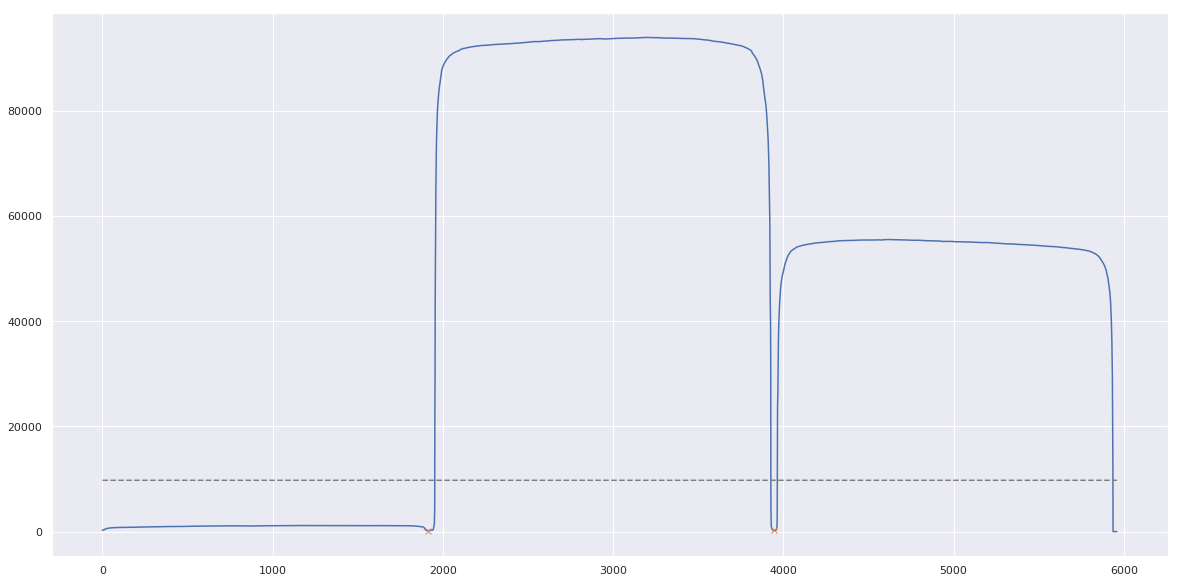

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
from scipy.signal import find_peaks
cov = bla['coverage'].apply(lambda x: -x)
mean = cov.mean()/5
peaks, prop = find_peaks(cov, height=mean, prominence=100)
plt.figure(figsize=(20,10))
plt.plot(-cov)
plt.plot(peaks, -cov.iloc[peaks], "x")
plt.plot(np.full_like(cov, -mean), "--", color="gray")
plt.show()

In [72]:
peaks

array([1910, 3946])

In [69]:
prop

{'peak_heights': array([-198., -241.]),
 'prominences': array([  971., 55271.]),
 'left_bases': array([1350, 3199]),
 'right_bases': array([3199, 4619])}

In [70]:
mean

-48752.4500922664

AttributeError: 'list' object has no attribute 'apply'